# 스택

## 문제1. 배열 구조를 이용한 구현 (2023.04.14)
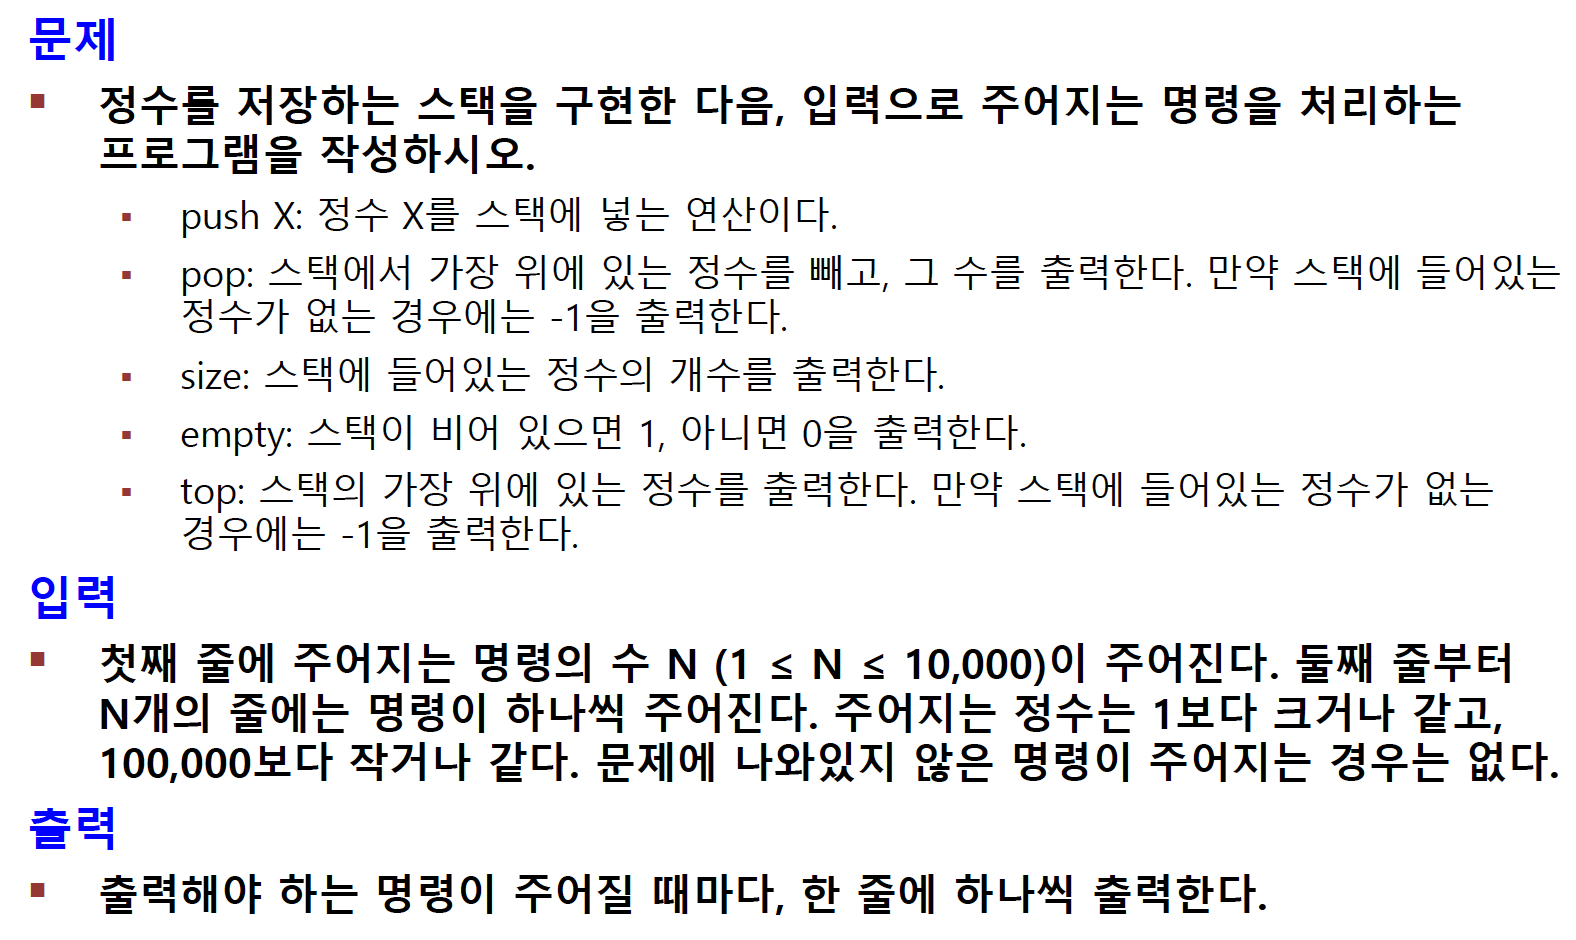

In [ ]:
def push(x):
  global stack
  stack.append(x)

def pop():
  global stack
  if len(stack)>0:
    result = stack.pop()
  else:
    result = -1
  return result

def size():
  global stack
  return len(stack)

def empty():
  global stack
  if size() == 0:
    return 1
  else: 
    return 0

def top():
  global stack
  if empty():
    return -1
  else:
    return stack.pop()

N = int(input('몇 번 수행할 것인지?: '))
stack = [] 
for _ in range(N):
  s = input().split(' ')
  if s[0] == 'push':
    push(s[1])
  elif s[0] == 'pop':
    print(pop())
  elif s[0] == 'size':
    print(size())
  elif s[0] == 'empty':
    print(empty())
  elif s[0] == 'top':
    print(top())
  else:
    print('wrong input!')


몇 번 수행할 것인지?: 7
push 1
push 2
push 3
size
3
empty
0
pop
3
size
2



## 문제2. 같은 숫자는 싫어 (2023.04.14)
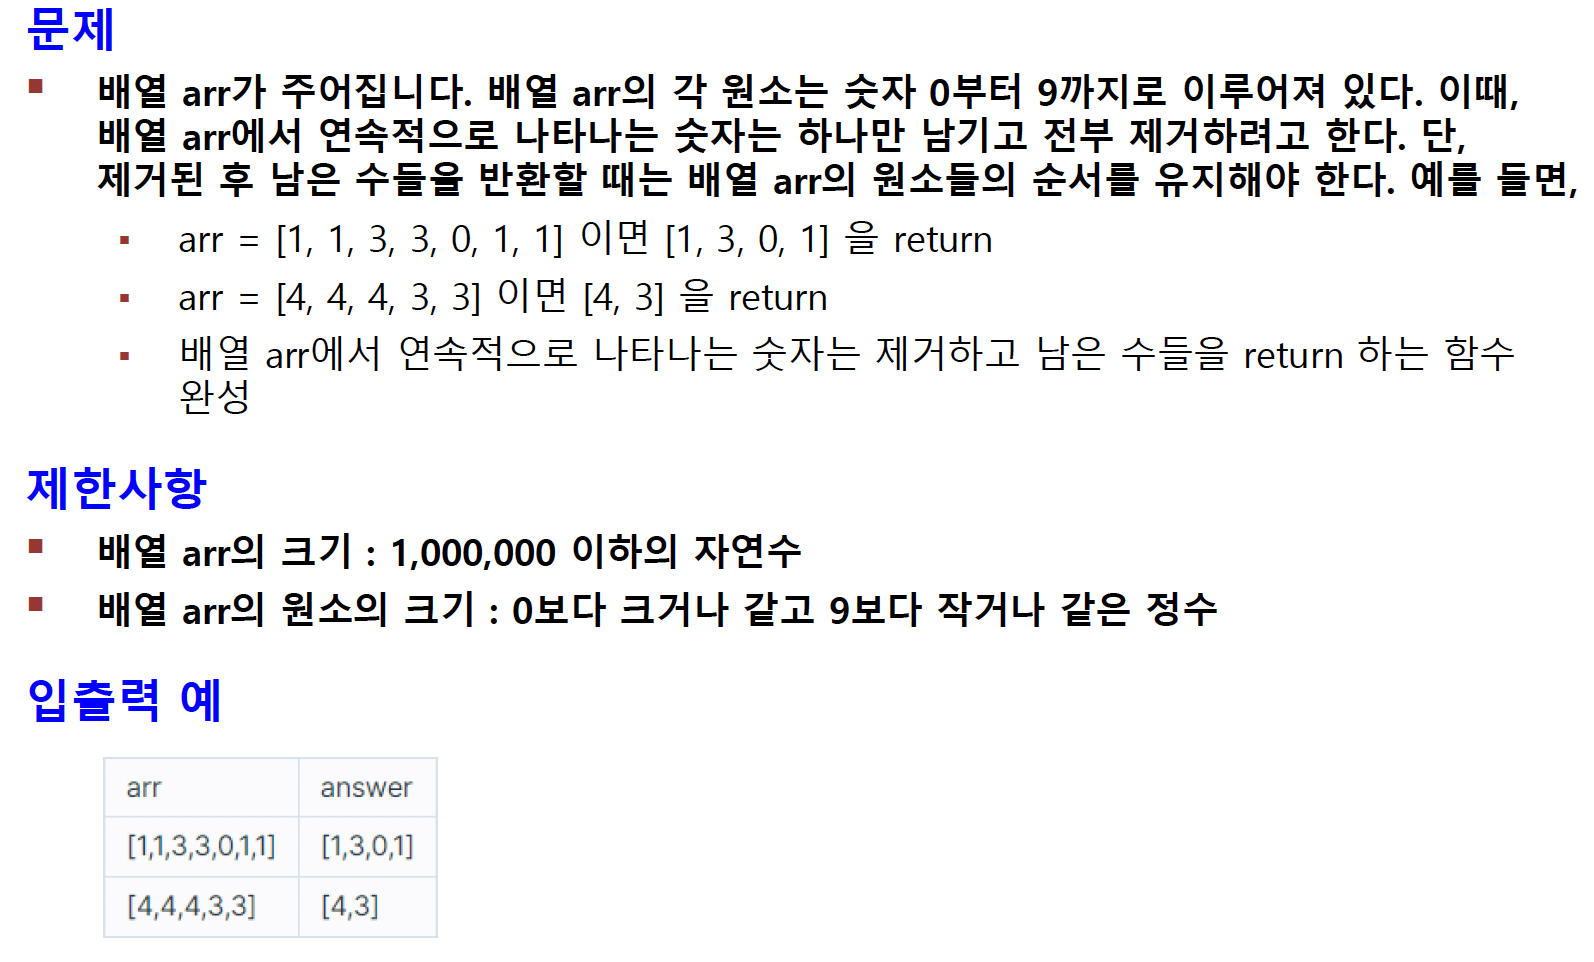

In [ ]:
def solution(arr):
  result = []
  result.append(arr[0])
  for i in range(1,len(arr)):
    if result[-1] != arr[i]:
      result.append(arr[i])
  return result

In [ ]:
solution([1,1,3,3,0,1,1])

[1, 3, 0, 1]

In [ ]:
solution([4,4,4,3,3])

[4, 3]

## 문제3. 스택 응용: [중위] -> [후위] (2023.04.14)
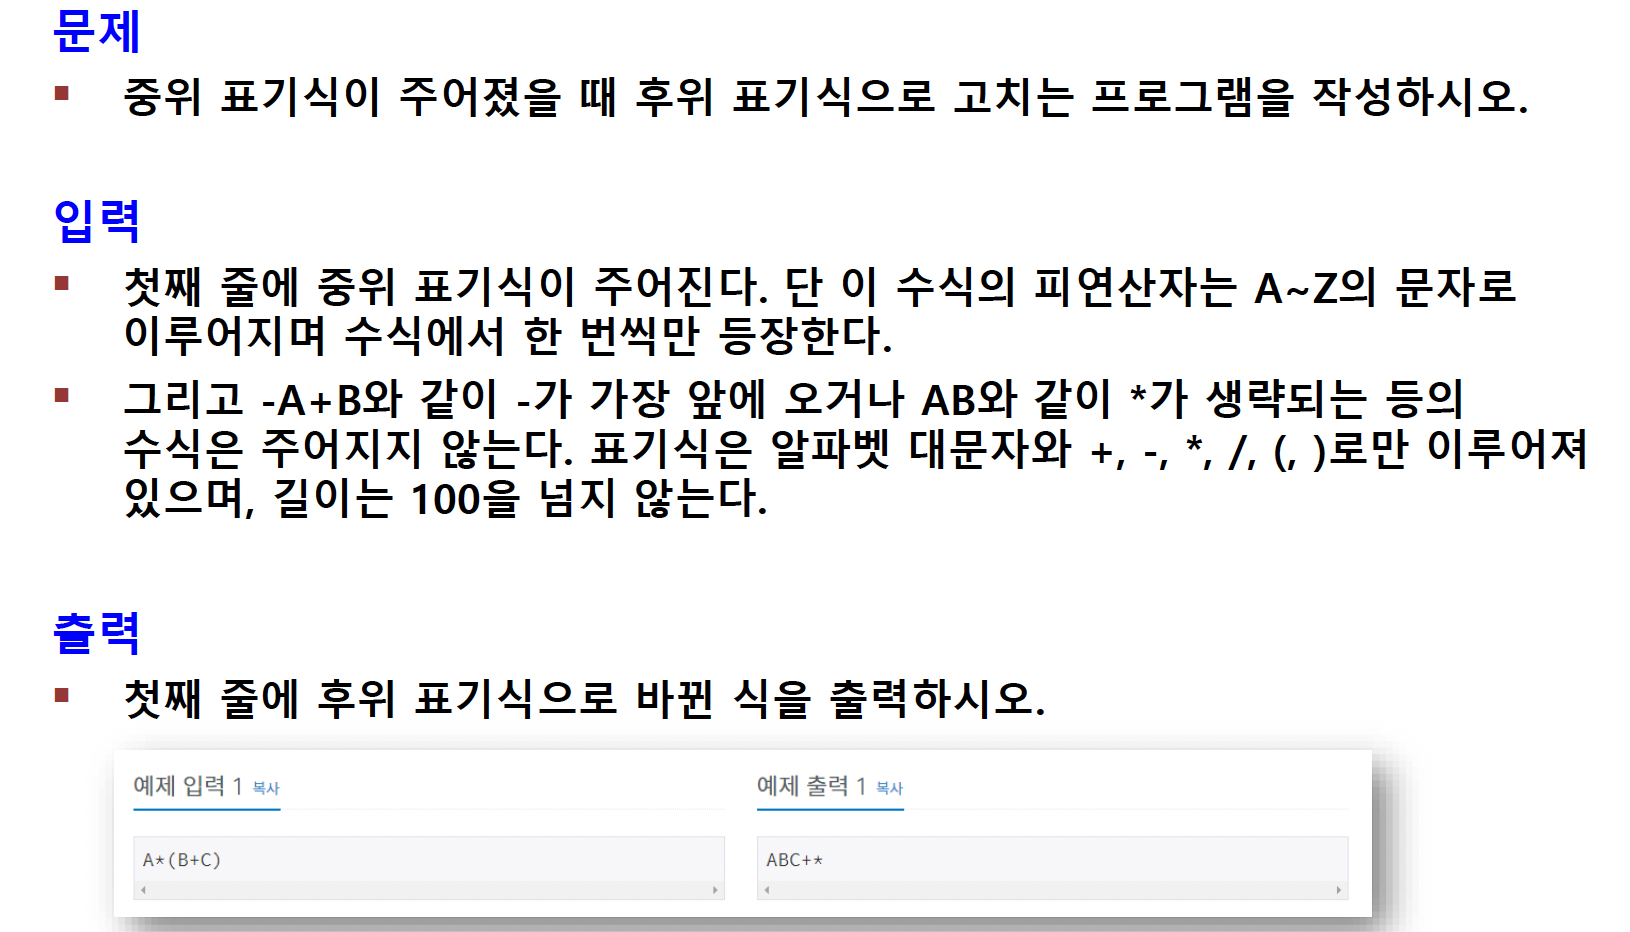

In [ ]:
# expr = input()
# from collections import deque
# string = []
# operator = []
# for i in range(len(expr),-1,-1):


In [ ]:
# 해답 풀이
prior = {'/':2, '*':2, '+':1, '-':1, '(':0} # 우선순위 높은 순서대로 0,1,2 부여
stack = []
expr = input().split(' ')

for s in expr:
  if s.isalpha():
    print(s, end=' ')
  elif s == '(':
    stack.append(s)
  elif s == ')':
    while True:
      temp = stack.pop()
      if temp == '(':
        break
      print(temp, end=' ')
  else: # 연산자
    while stack and prior[s] <= prior[stack[-1]]:  # 현재 연산자의 우선순위가 같거나 작으면 
      print(stack.pop(), end=' ')
    stack.append(s)

while stack:
  print(stack.pop(), end=' ')

a + d / c
a d c / + 

## 문제4. 크레인 인형뽑기 게임 (2023.04.19)
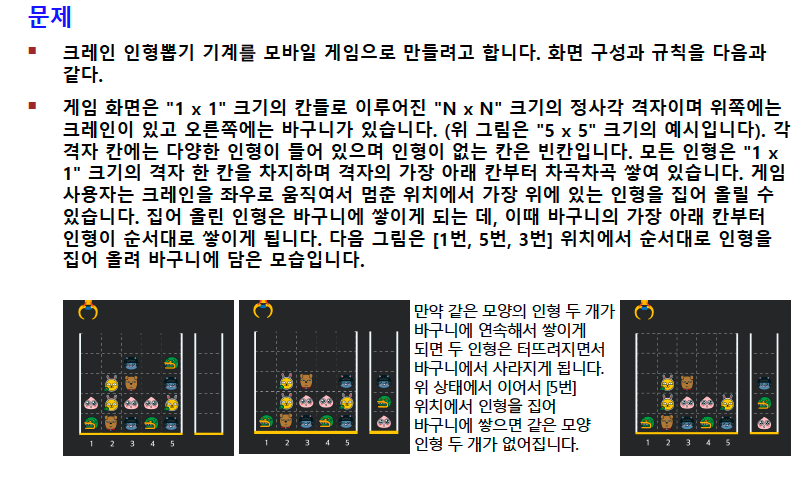

In [33]:
def solution(board, moves):
    answer = 0
    N = len(board)
    stack = []
    # moves 반복문
    for move in moves:
        # move 위치 맨 윗칸부터 스캔해서 인형 stack에 넣기
        for i in range(N):
            if board[i][move-1]>0:
                stack.append(board[i][move-1])
                board[i][move-1] = 0
                break
        # stack에서 같은 인형 2개 만나면 없애고 카운트 올리기
        if len(stack)>=2:
            if stack[-2:-1]==stack[-1:]:
                stack = stack[:-2]
                answer+=2
    return answer

In [34]:
solution([[0,0,0,0,0],[0,0,1,0,3],[0,2,5,0,1],[4,2,4,4,2],[3,5,1,3,1]], 
         [1,5,3,5,1,2,1,4])

4

In [35]:
solution([[0,0],[0,0]],[1])

0

# 큐

## 문제1. 단순 연결 리스트를 이용한 구현 (2023.04.19)
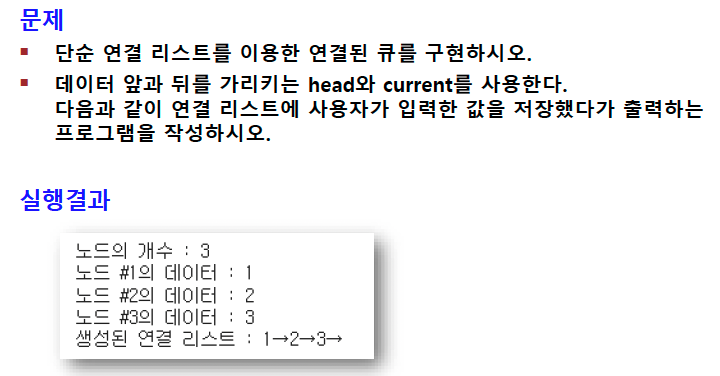

In [40]:
N = int(input('노드의 개수 : '))
q = []
head, current = 0, 0
for i in range(1,N+1):
  n = input(f'노드 #{i}의 데이터 : ')
  q.append(n)
  current+=1
print('생성된 연결 리스트 : ', end='')
for j in range(head, current):
  print(q[j], end='→')

노드의 개수 : 3
노드 #1의 데이터 : 1
노드 #2의 데이터 : 2
노드 #3의 데이터 : 3
생성된 연결 리스트 : 1→2→3→

# 문제2. 주식가격 (2023.04.20)
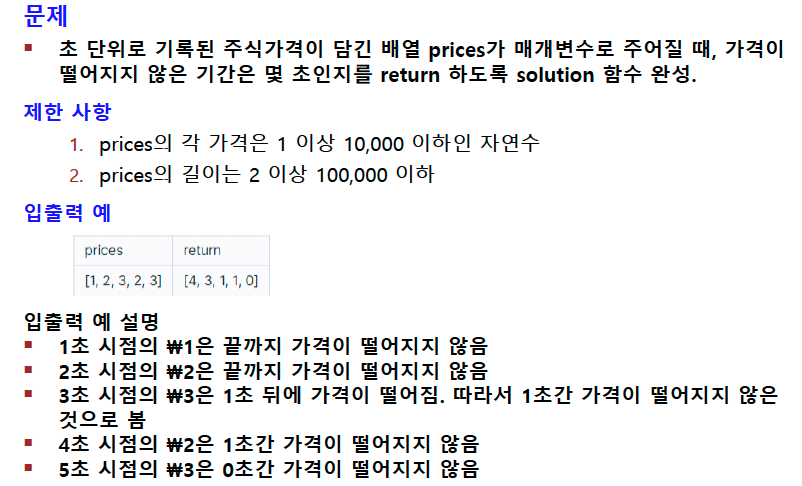

In [19]:
def solution(prices):
    answer = []
    n = len(prices)
    for i in range(n):
        if i != n-1:
            cnt = 1
            for j in range(i+1,n-1):
                if prices[j]>=prices[i]: 
                    cnt+=1
                else:
                    break
            answer.append(cnt)
        else:
            answer.append(0)
    return answer

In [33]:
solution([1,2,3,2,3])

[4, 3, 1, 1, 0]

In [32]:
# deque 사용 풀이
def solution(prices):
    from collections import deque
    answer = []
    prices = deque(prices)  # deque 객체 생성
    while prices: 
        c = prices.popleft()  # 큐 - 선입선출 (기준 주가 꺼내기)
        cnt = 0
        for p in prices:  # 기준 주가 뺀 주가 리스트
            if c > p:   # 기준 주가가 더 높으면 (즉, 하락했으면) +1하고 종료 
                cnt+=1
                break
            cnt+=1      # 상승하거나 보합이면 +1
        answer.append(cnt)
    return answer


# 문제3. 프린터큐 (2023.04.20)
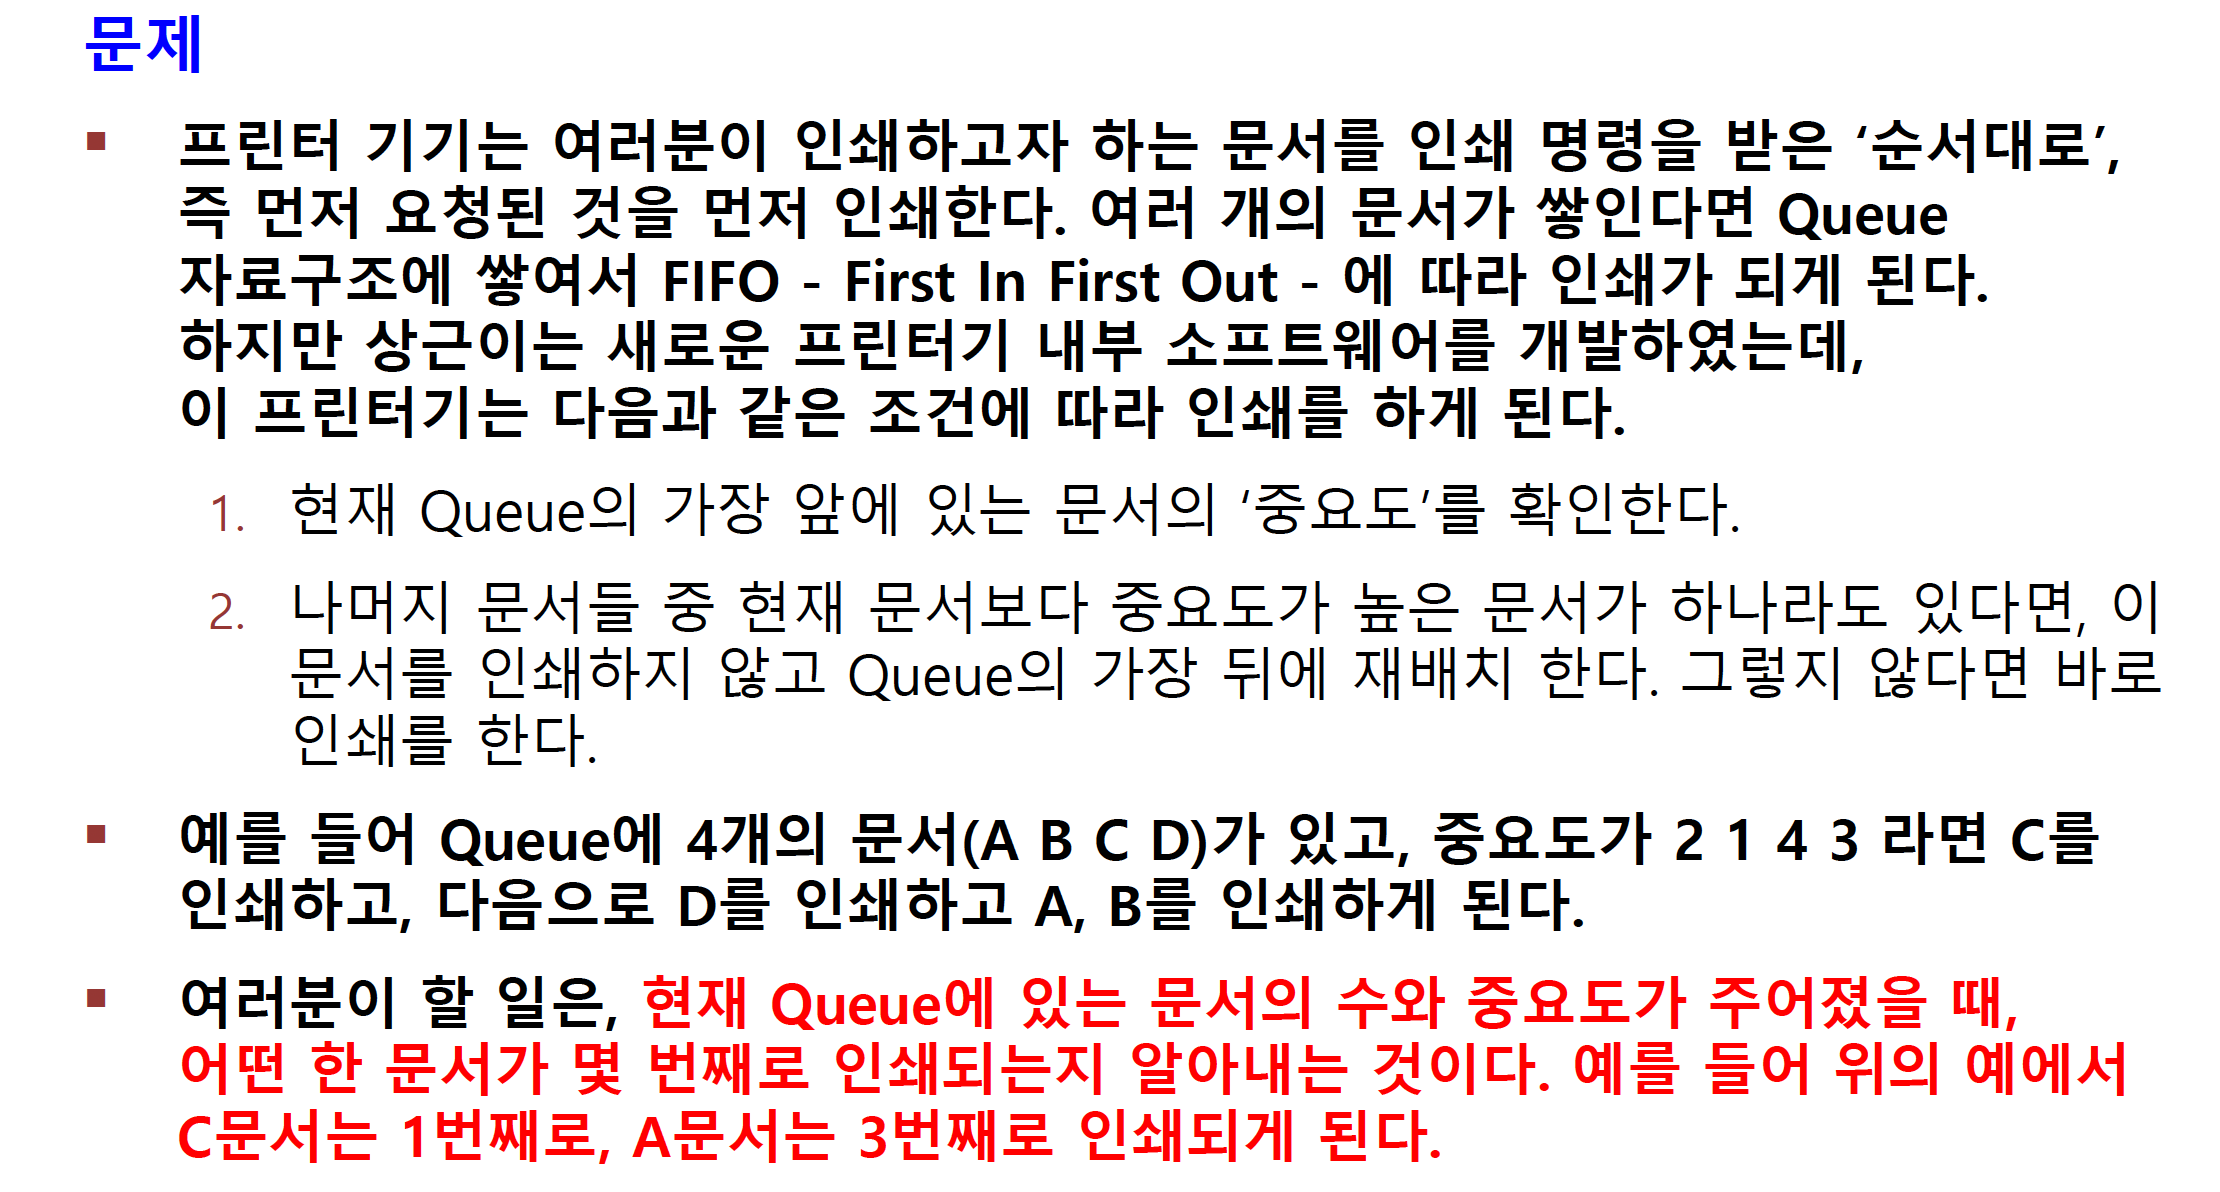

In [58]:
def solution(priorities, location):
    n = len(priorities)
    result = [0]*n
    i = 0
    rank = 1
    M = max(priorities)
    while result[location]==0:
        if priorities[i%n] == M:
            priorities[i%n]=0
            result[i%n] = rank
            rank+=1
            i+=1
            M = max(priorities)
        else:
            i+=1
    return result[location]

In [59]:
solution([2,1,3,2],2)

1

In [60]:
solution([1,1,9,1,1,1],0)

5

In [ ]:
# 큐 활용 풀이
## ⭐️any() 함수!! : iteration 모든 요소 중에서 하나라도 참인 경우 True 반환
def solution(priorities, location):
    queue = [(i,p) for i,p in enumerate(priorities)]
    answer = 0
    while True:
        current = queue.pop(0)  # 큐의 가장 첫번째 원소
        if any(current[1]<q[1] for q in queue):  # queue 리스트 원소 중에서 current보다 큰게 하나라도 있으면
            queue.append(current)  # queue에 current 다시 맨 뒤로 넣기
        else:    # current가 가장 크면
            answer += 1   # 순서 +1
            if current[0] == location:  # current의 위치인덱스가 location과 같으면 멈추고 반환
                return answer
